In [24]:
# import statsmodels.tsa as tsa
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

%matplotlib inline

def autocorrelation(x): #todo flatten with mean
    result = np.correlate(x,x,mode="full")
    return result[result.size//2:result.size//2+30]

In [25]:
# creating an AR2 Timeseries
ar2 = np.array([1,0.33,0.5])
ma = np.array([1])

ar2_data = ArmaProcess(ar2,ma).generate_sample(nsample=1000)
# plt.title("Ar(2) generated time series")
# plt.plot(ar2_data)
# plt.show()

# autcorr_ar2 = autocorrelation(ar2_data)
# plt.title("autocorrelation")
# plt.plot(autcorr_ar2)
# plt.show()

def get_frequencys(time_series):
    freq = np.fft.fft(time_series)
    return freq

def plot_surrogates(time_series, surrogate_method):
    time_series_surrogate = surrogate_method(time_series)
    fig, axs = plt.subplots(4, )
    fig.set_size_inches(5,10)
    mean = np.mean(time_series)
    std = np.std(time_series)
    mean_surrogate = np.mean(time_series_surrogate)
    std_surrogate = np.std(time_series_surrogate)
    axs[0].set_title("Timeseries")
    axs[0].plot(time_series, label=f"Original: mean={mean:.2f}, std={std:.2f}")
    axs[0].plot(time_series_surrogate, label=f"Surrogate: mean={mean_surrogate:.2f}, std={std_surrogate:.2f}")
    axs[0].set_xlabel("time steps")
    axs[0].set_ylabel("value")
    axs[1].set_title("Autocorrelation")
    axs[1].plot(autocorrelation(time_series))
    axs[1].plot(autocorrelation(time_series_surrogate))
    axs[2].set_title("Power Spectrum")
    f, Pxx = ss.periodogram(time_series) # calculate power spectrum
    axs[2].plot(f, Pxx)
    f_s, Pxx_s = ss.periodogram(time_series_surrogate)
    axs[2].plot(f_s, Pxx_s)
    axs[2].set_xlabel("frequencys")
    axs[2].set_ylabel("power")
    axs[3].hist(time_series)
    axs[3].hist(time_series_surrogate)
    axs[3].set_xlabel("values")
    axs[3].set_ylabel("occurance")
    fig.legend()
    fig.tight_layout()
    plt.plot()
    return
    





Random Shuffle Surrogates (RS)

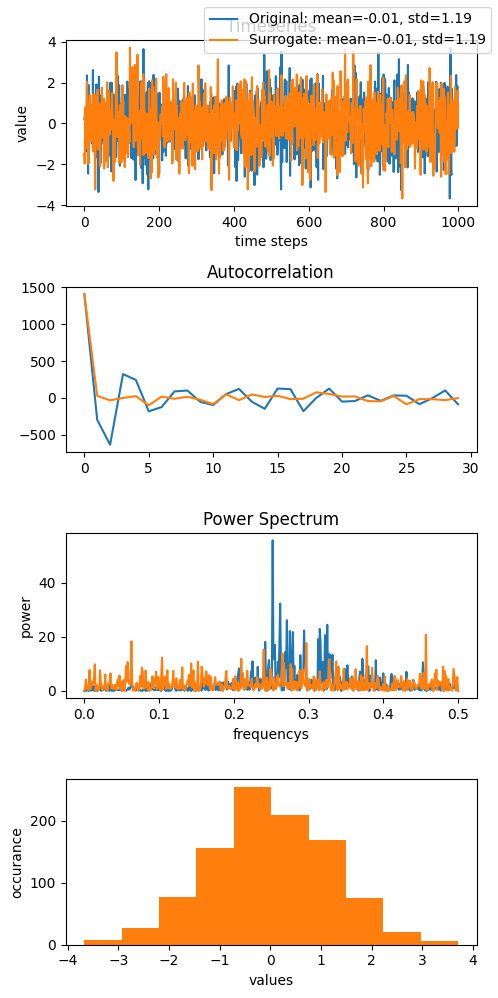

In [26]:
def RS(timeseries):
    """
        shuffles the values of the time series
    """
    RS_surrogate = np.copy(timeseries)
    np.random.shuffle(RS_surrogate)
    return RS_surrogate

plot_surrogates(ar2_data, RS)


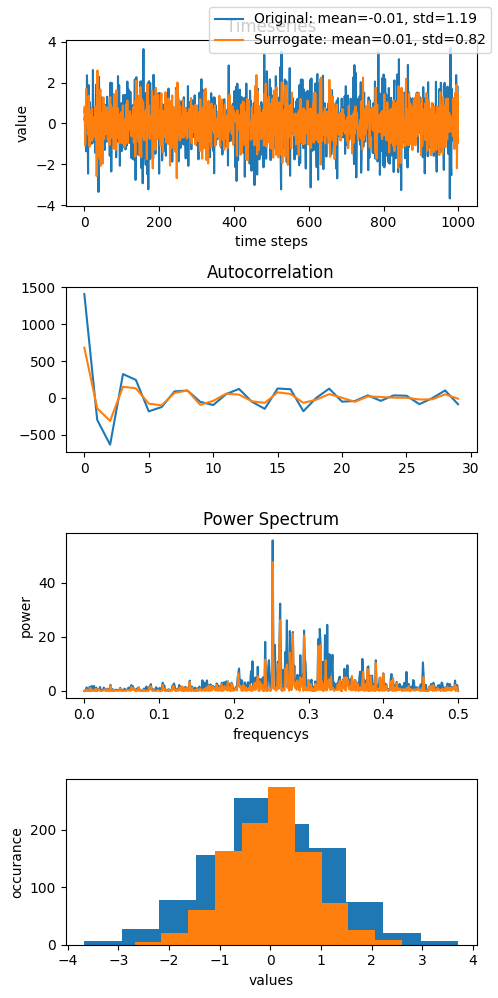

In [27]:
def FS_phase(timeseries):
    ft = np.fft.fft(timeseries)
    # phase = np.angle(ft) #phase of the complex fourier values
    amp = np.abs(ft) # amplitudes of the complex fourier values
    phase = np.random.uniform(0,2*np.pi, len(amp))
    value = np.fft.ifft(amp * np.exp(phase*1j))
    return np.real(value)

plot_surrogates(ar2_data, FS_phase)